# Exploratory Data Analysis

Lyft 3D Object Detection Dataset

# Install Lyft Dataset SDK

In [1]:
!pip install lyft_dataset_sdk

     |████████████████████████████████| 87 kB 419 kB/s eta 0:00:01
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=526179f311b71912e5a220db1d9d3c05f7f2fb413eb62d9aa924eb87ca005a6c
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.1
    Uninstalling importlib-metadata-4.8.1:
      Successfully uninstalled importlib-metadata-4.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.21.0 requires importlib-metadata>=4.8.1; python_version < "3.8", but you have importlib-metadata 4.2.0 which is incompatible.


In [2]:
# Make Paths Compatible
import os
os.system('rm -f data && ln -s /kaggle/input/3d-object-detection-for-autonomous-vehicles/train_data data')
os.system('rm  -f images && ln -s /kaggle/input/3d-object-detection-for-autonomous-vehicles/train_images images')
os.system('rm  -f maps && ln -s /kaggle/input/3d-object-detection-for-autonomous-vehicles/train_maps maps')
os.system('rm  -f lidar && ln -s /kaggle/input/3d-object-detection-for-autonomous-vehicles/train_lidar lidar')

0

In [3]:
# Load the SDK
%matplotlib inline
from lyft_dataset_sdk.lyftdataset import LyftDataset

level5data = LyftDataset(data_path = './', json_path = './data', verbose = True)

9 category,
18 attribute,
4 visibility,
18421 instance,
10 sensor,
148 calibrated_sensor,
177789 ego_pose,
180 log,
180 scene,
22680 sample,
189504 sample_data,
638179 sample_annotation,
1 map,
Done loading in 21.9 seconds.
Reverse indexing ...
Done reverse indexing in 5.2 seconds.


# SDK Functions for Data Exploration

In [4]:
level5data.list_scenes()

host-a007-lidar0-1230485630199365106-12304856550990... [19-01-02 17:33:50]   25s, Palo Alto, #anns:1559
host-a007-lidar0-1230672860198383106-12306728850991... [19-01-04 21:34:20]   25s, Palo Alto, #anns:2969
host-a007-lidar0-1230936221299185986-12309362461986... [19-01-07 22:43:41]   25s, Palo Alto, #anns:683
host-a007-lidar0-1231093036199514746-12310930610996... [19-01-09 18:17:16]   25s, Palo Alto, #anns:3117
host-a009-lidar0-1231200854198312986-12312008790984... [19-01-11 00:14:14]   25s, Palo Alto, #anns:681
host-a005-lidar0-1231201437298603426-12312014621988... [19-01-11 00:23:57]   25s, Palo Alto, #anns:3064
host-a011-lidar0-1232401360198078026-12324013850983... [19-01-24 21:42:40]   25s, Palo Alto, #anns:3842
host-a011-lidar0-1232412236198491106-12324122610982... [19-01-25 00:43:56]   25s, Palo Alto, #anns:372
host-a007-lidar0-1232470052198454586-12324700770988... [19-01-25 16:47:32]   25s, Palo Alto, #anns:1614
host-a011-lidar0-1232485958298280666-12324859832000... [19-01-25 21

In [5]:
example_scene = level5data.scene[0]
example_scene

{'log_token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100',
 'first_sample_token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'name': 'host-a101-lidar0-1241893239199111666-1241893264098084346',
 'description': '',
 'last_sample_token': '2346756c83f6ae8c4d1adec62b4d0d31b62116d2e1819e96e9512667d15e7cec',
 'nbr_samples': 126,
 'token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100'}

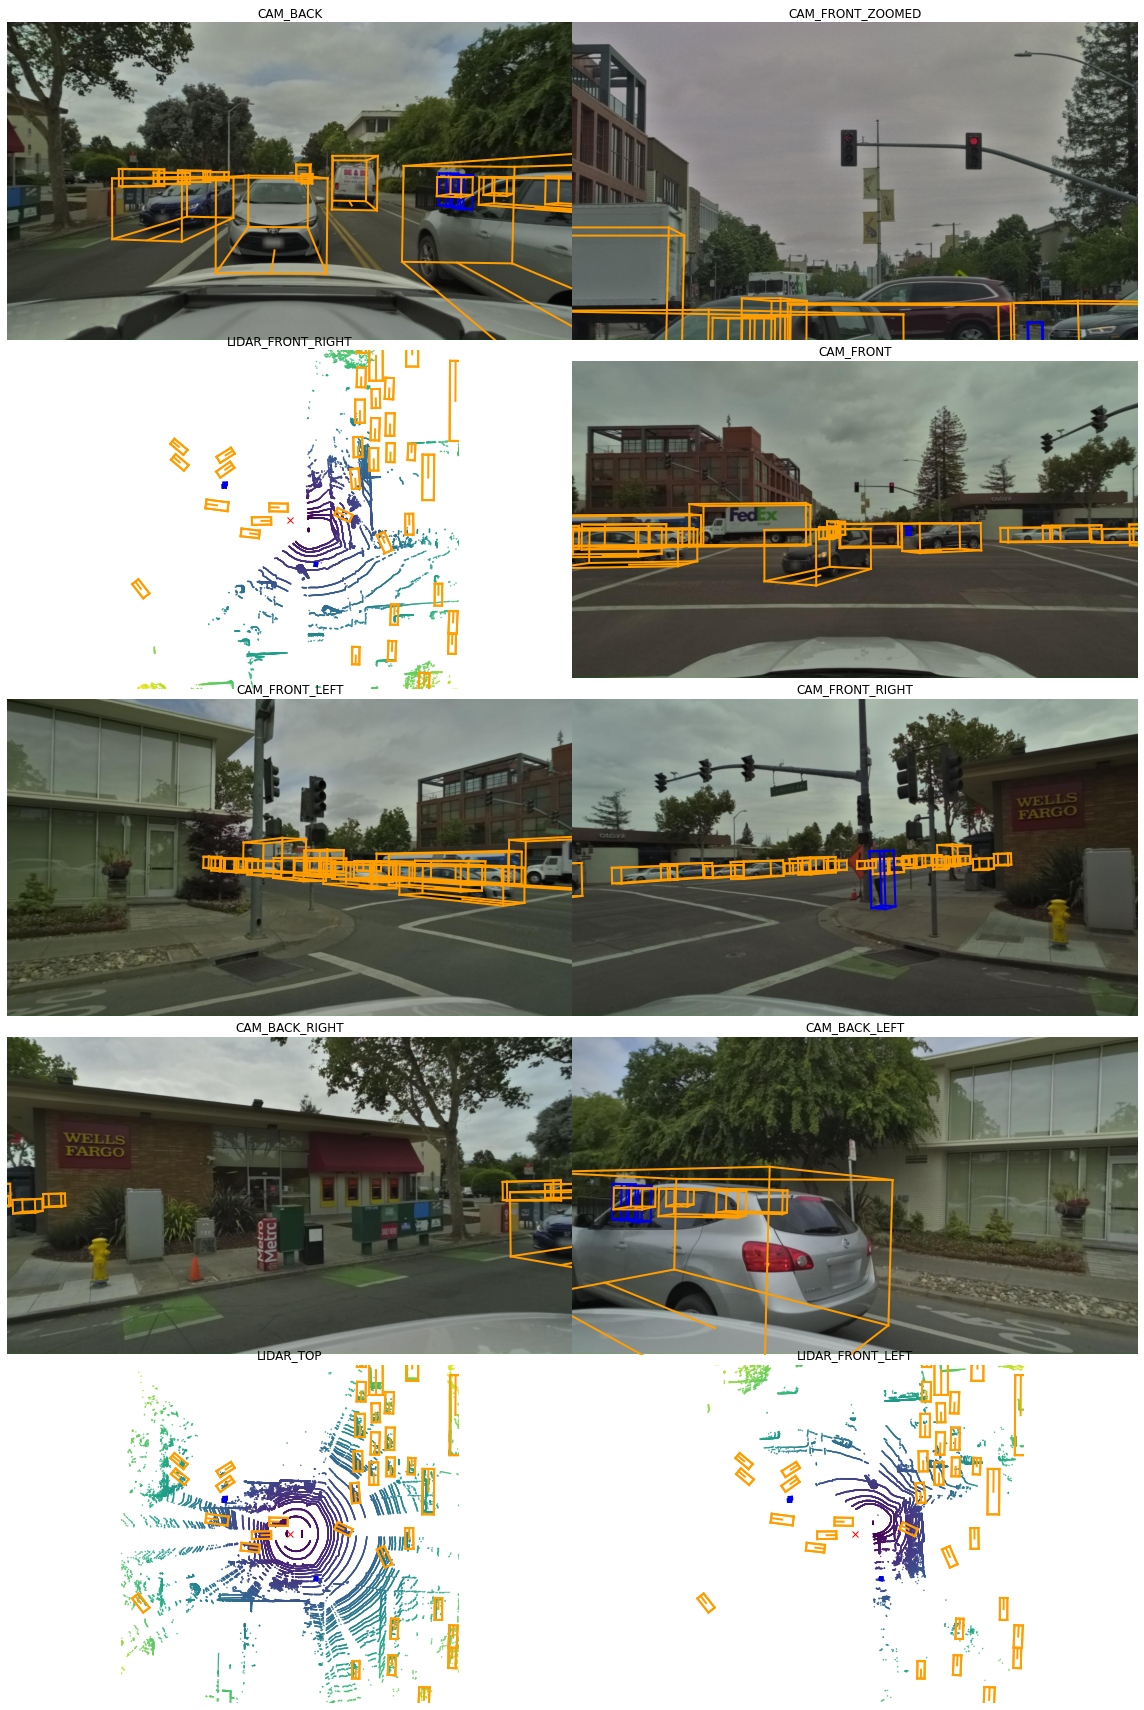

In [6]:
sample_token = example_scene["first_sample_token"]
level5data.render_sample(sample_token)

In [7]:
sample = level5data.get('sample', sample_token)
sample

{'next': 'c2ba18e4414ce9038ad52efab44e1a0a211ff1e6b297a632805000510756174d',
 'prev': '',
 'token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'timestamp': 1557858039302414.8,
 'scene_token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100',
 'data': {'CAM_BACK': '542a9e44f2e26221a6aa767c2a9b90a9f692c3aee2edb7145256b61e666633a4',
  'CAM_FRONT_ZOOMED': '9c9bc711d93d728666f5d7499703624249919dd1b290a477fcfa39f41b26259e',
  'LIDAR_FRONT_RIGHT': '8cfae06bc3d5d7f9be081f66157909ff18c9f332cc173d962460239990c7a4ff',
  'CAM_FRONT': 'fb40b3b5b9d289cd0e763bec34e327d3317a7b416f787feac0d387363b4d00f0',
  'CAM_FRONT_LEFT': 'f47a5d143bcebb24efc269b1a40ecb09440003df2c381a69e67cd2a726b27a0c',
  'CAM_FRONT_RIGHT': '5dc54375a9e14e8398a538ff97fbbee7543b6f5df082c60fc4477c919ba83a40',
  'CAM_BACK_RIGHT': 'ae8754c733560aa2506166cfaf559aeba670407631badadb065a9ffe7c337a7d',
  'CAM_BACK_LEFT': '01c0eecd4b56668e949143e02a117b5683025766d186920099d1e918c23c8b4b',
  'LIDAR

In [8]:
level5data.list_sample(sample["token"])

Sample: 24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8

sample_data_token: 542a9e44f2e26221a6aa767c2a9b90a9f692c3aee2edb7145256b61e666633a4, mod: camera, channel: CAM_BACK
sample_data_token: 9c9bc711d93d728666f5d7499703624249919dd1b290a477fcfa39f41b26259e, mod: camera, channel: CAM_FRONT_ZOOMED
sample_data_token: 8cfae06bc3d5d7f9be081f66157909ff18c9f332cc173d962460239990c7a4ff, mod: lidar, channel: LIDAR_FRONT_RIGHT
sample_data_token: fb40b3b5b9d289cd0e763bec34e327d3317a7b416f787feac0d387363b4d00f0, mod: camera, channel: CAM_FRONT
sample_data_token: f47a5d143bcebb24efc269b1a40ecb09440003df2c381a69e67cd2a726b27a0c, mod: camera, channel: CAM_FRONT_LEFT
sample_data_token: 5dc54375a9e14e8398a538ff97fbbee7543b6f5df082c60fc4477c919ba83a40, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: ae8754c733560aa2506166cfaf559aeba670407631badadb065a9ffe7c337a7d, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 01c0eecd4b56668e949143e02a117b5683025766d186920099d1e918c23

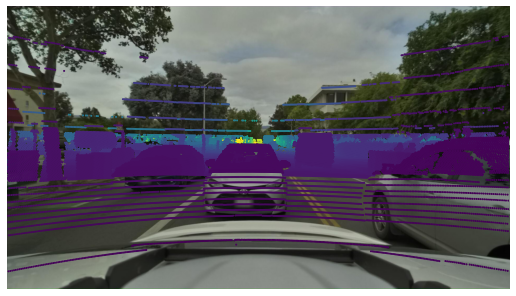

In [9]:
level5data.render_pointcloud_in_image(sample_token = sample["token"],
                                      dot_size = 1,
                                      camera_channel = 'CAM_BACK')

In [10]:
sample["data"]

{'CAM_BACK': '542a9e44f2e26221a6aa767c2a9b90a9f692c3aee2edb7145256b61e666633a4',
 'CAM_FRONT_ZOOMED': '9c9bc711d93d728666f5d7499703624249919dd1b290a477fcfa39f41b26259e',
 'LIDAR_FRONT_RIGHT': '8cfae06bc3d5d7f9be081f66157909ff18c9f332cc173d962460239990c7a4ff',
 'CAM_FRONT': 'fb40b3b5b9d289cd0e763bec34e327d3317a7b416f787feac0d387363b4d00f0',
 'CAM_FRONT_LEFT': 'f47a5d143bcebb24efc269b1a40ecb09440003df2c381a69e67cd2a726b27a0c',
 'CAM_FRONT_RIGHT': '5dc54375a9e14e8398a538ff97fbbee7543b6f5df082c60fc4477c919ba83a40',
 'CAM_BACK_RIGHT': 'ae8754c733560aa2506166cfaf559aeba670407631badadb065a9ffe7c337a7d',
 'CAM_BACK_LEFT': '01c0eecd4b56668e949143e02a117b5683025766d186920099d1e918c23c8b4b',
 'LIDAR_TOP': 'ec9950f7b5d4ae85ae48d07786e09cebbf4ee771d054353f1e24a95700b4c4af',
 'LIDAR_FRONT_LEFT': '5c3d79e1cf8c8182b2ceefa33af96cbebfc71f92e18bf64eb8d4e0bf162e01d4'}

In [11]:
sensor_channel = 'LIDAR_TOP'
sample_data = level5data.get('sample_data', sample['data'][sensor_channel])
sample_data

{'is_key_frame': True,
 'prev': '',
 'fileformat': 'bin',
 'token': 'ec9950f7b5d4ae85ae48d07786e09cebbf4ee771d054353f1e24a95700b4c4af',
 'timestamp': 1557858039302414.8,
 'next': 'b2fb6b275352ff1bc8d63cae2ec88561dddb044cae6f8e6ee7ada4ed07d79dc7',
 'ego_pose_token': '2d673d4bee560c77788b91e2ee24503538e74a23e7972e3e0099b92015f76dde',
 'sample_token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'calibrated_sensor_token': '82130f5d48b806b62fec95989081337218fbf338ebcc95115d8afcebb305630c',
 'filename': 'lidar/host-a101_lidar1_1241893239302414726.bin',
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_TOP'}

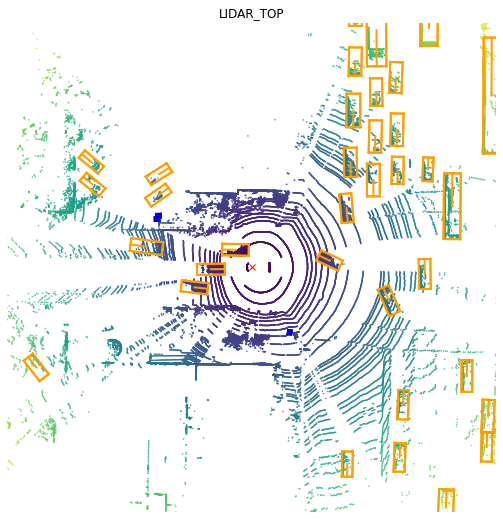

In [12]:
level5data.render_sample_data(sample_data['token'])

In [13]:
sensor_channel = 'CAM_BACK'
sample_data = level5data.get('sample_data', sample['data'][sensor_channel])
sample_data

{'width': 1920,
 'height': 1080,
 'calibrated_sensor_token': '59155106c0ac5abe83cb6558ad8ce98400e3c3abf51234734bc89bc9d613470a',
 'token': '542a9e44f2e26221a6aa767c2a9b90a9f692c3aee2edb7145256b61e666633a4',
 'sample_token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'is_key_frame': True,
 'prev': '',
 'fileformat': 'jpeg',
 'ego_pose_token': '0c257254dad346c9d90f7970ce2c0b8142f7c6e6a90716f4c0538cd2d2ef77d5',
 'timestamp': 1557858039200000.0,
 'next': '8d614daa8d1d48d3af4a0c817b676da1cb3e68f1432296eb52cfc428d0ff4d6d',
 'filename': 'images/host-a101_cam3_1241893239200000006.jpeg',
 'sensor_modality': 'camera',
 'channel': 'CAM_BACK'}

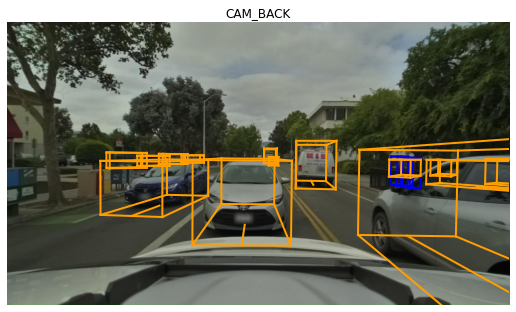

In [14]:
level5data.render_sample_data(sample_data['token'])

In [15]:
annotation_token = sample['anns'][4]
annotation = sample_data.get('sample_annotation', annotation_token)
annotation

'6ef405e1f47a4a234f0bfeeb559d61c70031af6c47bf2e499a31002f845cd403'

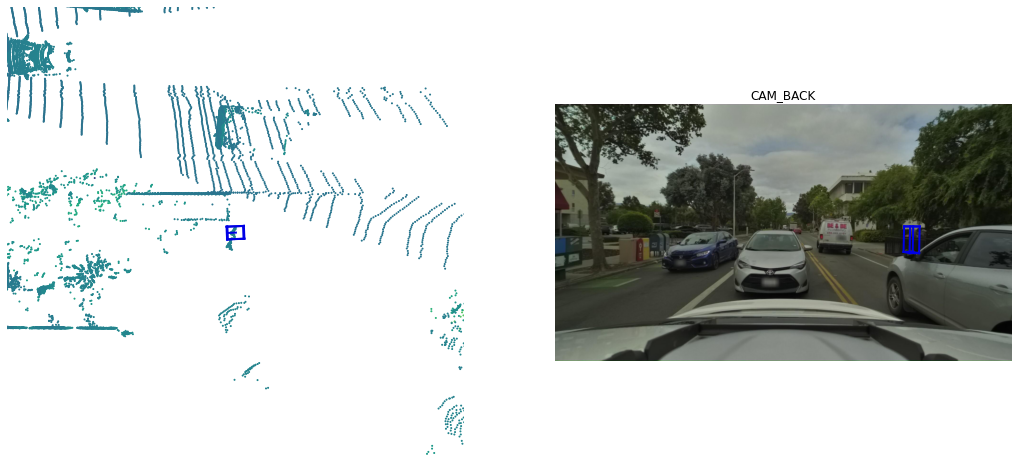

In [16]:
level5data.render_annotation(annotation_token)

In [17]:
instance = level5data.instance[0]
instance

{'last_annotation_token': 'bcaa7c8be6503c2c2767b414e89598ea45ec1bf431eec1734aad7c36054548b0',
 'category_token': '8eccddb83fa7f8f992b2500f2ad658f65c9095588f3bc0ae338d97aff2dbcb9c',
 'token': 'c50ef1538e11e03d232eca295c80b0e76040507d4d27850c26645ca99bfa7ab7',
 'first_annotation_token': '9811e373205791873b2a6aeb7852392fd4e060ea00074dd63e27ae78e9c774a0',
 'nbr_annotations': 49}

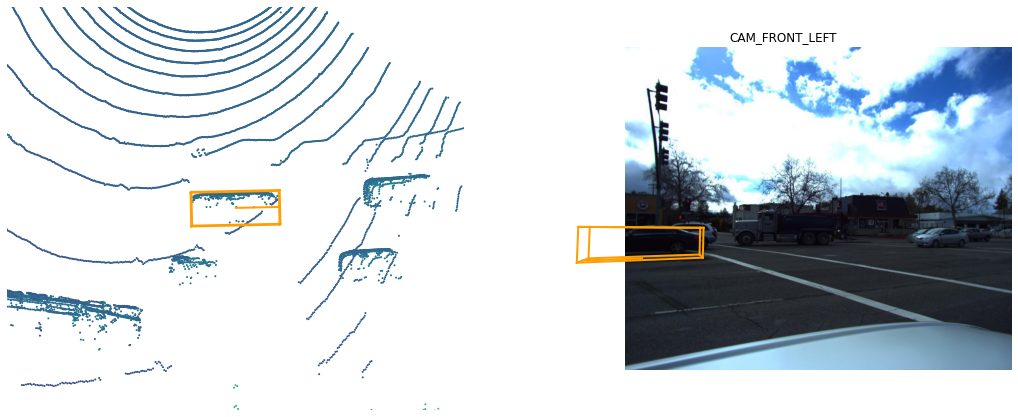

In [18]:
instance_token = instance['token']
level5data.render_instance(instance_token)

First annotated sample of this instance:


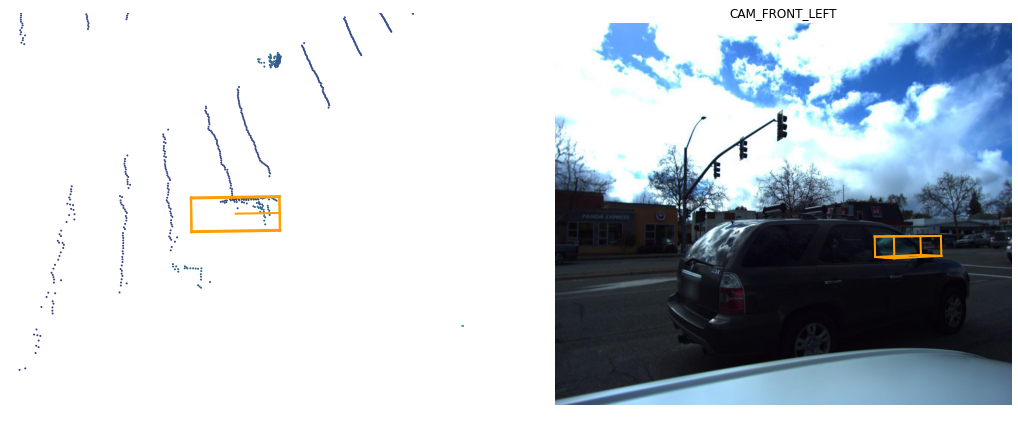

In [19]:
print("First annotated sample of this instance:")
level5data.render_annotation(instance['first_annotation_token'])

Last annotated sample of this instance:


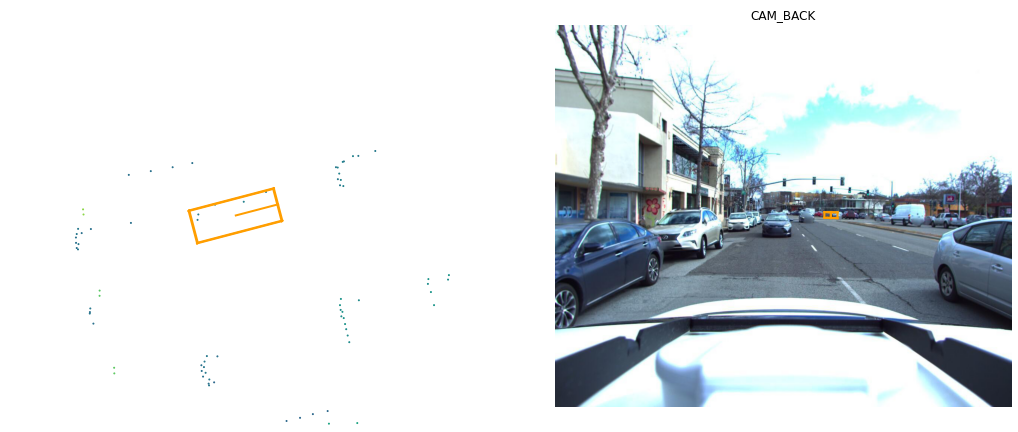

In [20]:
print("Last annotated sample of this instance:")
level5data.render_annotation(instance["last_annotation_token"])

In [21]:
level5data.list_categories()

Category stats
animal                      n=  186, width= 0.36±0.12, len= 0.73±0.19, height= 0.51±0.16, lw_aspect= 2.16±0.56
bicycle                     n=20928, width= 0.63±0.24, len= 1.76±0.29, height= 1.44±0.37, lw_aspect= 3.20±1.17
bus                         n= 8729, width= 2.96±0.24, len=12.34±3.41, height= 3.44±0.31, lw_aspect= 4.17±1.10
car                         n=534911, width= 1.93±0.16, len= 4.76±0.53, height= 1.72±0.24, lw_aspect= 2.47±0.22
emergency_vehicle           n=  132, width= 2.45±0.43, len= 6.52±1.44, height= 2.39±0.59, lw_aspect= 2.66±0.28
motorcycle                  n=  818, width= 0.96±0.20, len= 2.35±0.22, height= 1.59±0.16, lw_aspect= 2.53±0.50
other_vehicle               n=33376, width= 2.79±0.30, len= 8.20±1.71, height= 3.23±0.50, lw_aspect= 2.93±0.53
pedestrian                  n=24935, width= 0.77±0.14, len= 0.81±0.17, height= 1.78±0.16, lw_aspect= 1.06±0.20
truck                       n=14164, width= 2.84±0.32, len=10.24±4.09, height= 3.44±0.62, lw_asp

In [22]:
level5data.category[0]

{'description': '',
 'token': '8eccddb83fa7f8f992b2500f2ad658f65c9095588f3bc0ae338d97aff2dbcb9c',
 'name': 'car'}

In [23]:
level5data.list_attributes()

is_stationary: 321981
object_action_abnormal_or_traffic_violation: 2
object_action_driving_straight_forward: 244805
object_action_gliding_on_wheels: 165
object_action_lane_change_left: 1463
object_action_lane_change_right: 1370
object_action_left_turn: 5074
object_action_loss_of_control: 1
object_action_other_motion: 582
object_action_parked: 257939
object_action_reversing: 278
object_action_right_turn: 6694
object_action_running: 621
object_action_sitting: 586
object_action_standing: 5332
object_action_stopped: 94970
object_action_u_turn: 407
object_action_walking: 17890


In [24]:
for instance in level5data.instance:
    first_token = instance['first_annotation_token']
    last_token = instance['last_annotation_token']
    nbr_samples = instance['nbr_annotations']
    current_token = first_token
    
    i = 0
    found_change = False
    while current_token != last_token:
        current_ann = level5data.get('sample_annotation', current_token)
        current_attr = level5data.get('attribute', current_ann['attribute_tokens'][0])['name']
        
        if i == 0:
            pass
        elif current_attr != last_attr:
            print(f"Changed from {last_attr} to {current_attr} at timestamp {i} out of {nbr_samples}")
            found_change = True
            
        next_token = current_ann["next"]
        current_token = next_token
        last_attr = current_attr
        i += 1

Changed from object_action_driving_straight_forward to object_action_right_turn at timestamp 1 out of 39
Changed from object_action_right_turn to object_action_driving_straight_forward at timestamp 12 out of 39
Changed from object_action_driving_straight_forward to object_action_left_turn at timestamp 42 out of 72
Changed from object_action_left_turn to object_action_driving_straight_forward at timestamp 66 out of 72
Changed from object_action_driving_straight_forward to object_action_right_turn at timestamp 19 out of 47
Changed from object_action_right_turn to object_action_driving_straight_forward at timestamp 39 out of 47
Changed from object_action_stopped to object_action_driving_straight_forward at timestamp 23 out of 88
Changed from object_action_driving_straight_forward to object_action_lane_change_left at timestamp 27 out of 88
Changed from object_action_lane_change_left to object_action_driving_straight_forward at timestamp 43 out of 88
Changed from object_action_driving_strai

In [25]:
level5data.sensor

[{'modality': 'camera',
  'channel': 'CAM_FRONT_LEFT',
  'token': 'f7dad6bb70cb8e6245f96e5537e382848335872e6e259218b0a80cc071d162c4'},
 {'modality': 'lidar',
  'channel': 'LIDAR_FRONT_LEFT',
  'token': '629da739ea3a0814b9d79ffc3b99cdbc8bdbb6f97abf139f1ad33bd12f8fa94d'},
 {'modality': 'camera',
  'channel': 'CAM_FRONT',
  'token': 'eb9e8f60a3d6e3328d7512b9f8e6800127fe91f4d62bc8e48a0e6a7cb116cc60'},
 {'modality': 'lidar',
  'channel': 'LIDAR_TOP',
  'token': '25bf751d7e35f295393d8a418731474b21c1f702e878c4553f112397caa48c08'},
 {'modality': 'camera',
  'channel': 'CAM_BACK_LEFT',
  'token': 'c84592e22beb2c0f14d5159245ce8d6678431b879e940eed580651c09cc7d2f1'},
 {'modality': 'lidar',
  'channel': 'LIDAR_FRONT_RIGHT',
  'token': '953faed96fd3d2fae3ec03cd2838b312b8c1a9bb7a0629481982870cb28acb67'},
 {'modality': 'camera',
  'channel': 'CAM_BACK',
  'token': '172a55e2b50f18a6b6d545369a457003c2f3b438d0180b2b4c7819ca29b3f6ab'},
 {'modality': 'camera',
  'channel': 'CAM_BACK_RIGHT',
  'token': '8e0

In [26]:
level5data.sample_data[10]

{'is_key_frame': True,
 'fileformat': 'bin',
 'prev': '89e066a61d09acfb201c91d9f2b9bef2d89d96a22ab41efb09704a1319567872',
 'calibrated_sensor_token': '7efae113b75a3c387bb2a92439be7e795e5caabd5819b4e9b6f89e8955c87a44',
 'token': '5146c66963a2100cc5850485741dbf30aae6fc500a684be1ff677d45d2a5b616',
 'timestamp': 1551388503101689.8,
 'next': '3f2ef26d47f69a1f0ad69393d065fd8d29fcdcb5a0cf0340b3522102d48862ce',
 'ego_pose_token': 'c51a6d17e3c5c17d0a4a8a0208785143b060d954dd78bb93ec4653b4897fc87d',
 'sample_token': '2bd45a80fba943914188bc31fa3bc8a5b9b4156da4376cede52d76347b1ac7ef',
 'filename': 'lidar/host-a015_lidar1_1235423703101689806.bin',
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_TOP'}

In [27]:
level5data.calibrated_sensor[10]

{'sensor_token': 'c84592e22beb2c0f14d5159245ce8d6678431b879e940eed580651c09cc7d2f1',
 'rotation': [-0.678313276414017,
  0.6863055604671354,
  0.1936377698473964,
  -0.17714454775944757],
 'camera_intrinsic': [[880.38198961, 0, 611.98712358],
  [0.0, 880.38198961, 520.436292635],
  [0.0, 0.0, 1.0]],
 'translation': [1.0427700669795863, 0.3094189508563848, 1.6362334405187235],
 'token': '5f3b2122891c4080769d4a240b0a711774b5e8ff276eb6ad2e4004bf8043315a'}

In [28]:
level5data.ego_pose[10]

{'rotation': [0.8005936312188016,
  0.04773009636388127,
  -0.0055218730187153965,
  0.5972781466547669],
 'translation': [527.1570055943749, 3144.8527597851435, 0.3687619352997339],
 'token': '8e6e29406ba6882c1af9b65be0ca34dbe00f1b5e9e8f7412c6c5c534ed179945',
 'timestamp': 1548377040502068.8}

In [29]:
print(f"Number of logs loaded in database: {len(level5data.log)}")

Number of logs loaded in database: 180


In [30]:
level5data.log[0]

{'date_captured': '2019-05-14',
 'location': 'Palo Alto',
 'token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100',
 'vehicle': 'a101',
 'logfile': '',
 'map_token': '53992ee3023e5494b90c316c183be829'}

In [31]:
print(f"There are {len(level5data.map)} maps masks in the loaded dataset")

There are 1 maps masks in the loaded dataset


In [32]:
level5data.map[0]

{'log_tokens': ['da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100',
  '0a6839d6ee6804113bb5591ed99cc70ad883d0cff396e3aec5e76e718771b30e',
  'a939e6edc494777d058c3b1eafb91a7236f6b4ff5e98c9abb1216046a0b3a45f',
  'e8f8379c823fd0505b63f2612505e1d3de1018ecc3328f1bf0c1144f35c1a71d',
  'ccc0662a4dbc63f589358ac9589b677f6d4165a128af93baf26619711c1d7b4f',
  '400d70cf4c3202418a17814b4dfa5542d1f069fe9716a0b5fdeee104863b4124',
  '094c956927749d576052c7473a190ef86dc07e8ad7038b3132307518fa36af86',
  '2983e04fcfd25de0207bbb706d6bfebbdd7b63b0844244c51203d85ba249c67d',
  'e4ef32757dcdf15f0142cd2a4a2773d061156b889a6790d87654db57e3ffdf4e',
  'af749b4da1ab470bd4af7bab1a1e9ea358349839844de30291ec3c1c15f94f48',
  '973c6a14c4af72f7b0d067224adb918902f48366ce06315f3ed384c2d9836003',
  'f0be85ab6d620d12f2fb4b43fd0892125a19ce9371381618c3df9033c179ce9f',
  '2ea4540f5f6177d2c086003d343fe8518f9515e9e90439d4de3d649d78feadb4',
  '1311c21036beed062494ea839c6adcfc14fbed576d4e2d067bf0f656e47753cd',
  '473

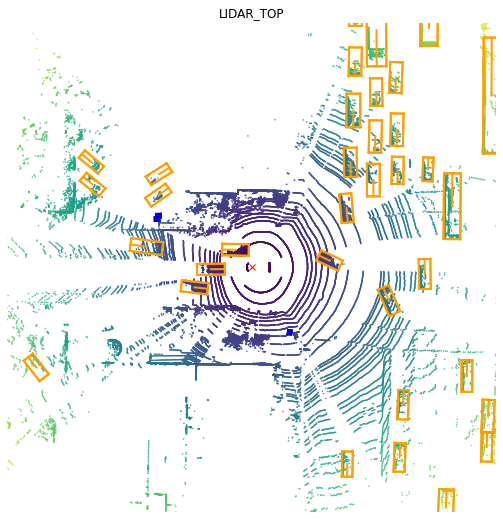

In [33]:
sensor_channel = 'LIDAR_TOP'
sample_data = level5data.get('sample_data', sample['data'][sensor_channel])
level5data.render_sample_data(sample_data['token'])

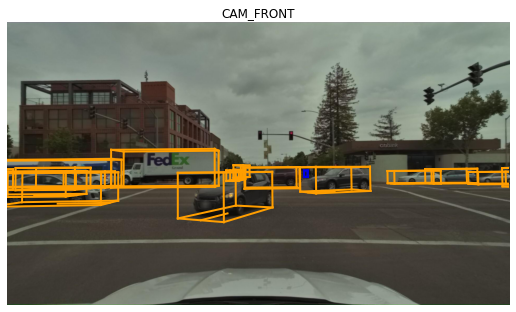

In [34]:
sensor_channel = 'CAM_FRONT'
sample_data = level5data.get('sample_data', sample['data'][sensor_channel])
level5data.render_sample_data(sample_data['token'])

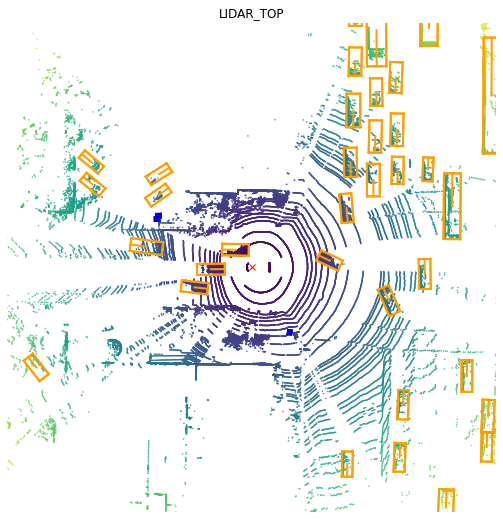

In [35]:
level5data.render_sample_data(sample['data']['LIDAR_TOP'], nsweeps=5)

# Videos

In [36]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [37]:
cams = ["CAM_FRONT", "CAM_FRONT_RIGHT", "CAM_FRONT_LEFT",
        "CAM_BACK", "CAM_BACK_RIGHT", "CAM_BACK_LEFT"]

def generate_next_token(scene):
    scene = level5data.scene[scene]
    sample_token = scene['first_sample_token']
    sample_record = level5data.get('sample', sample_token)
    
    while sample_record["next"]:
        sample_token = sample_record["next"]
        sample_record = level5data.get("sample", sample_token)
        
        yield sample_token
        
def animate_images(scene, frames, pointsensor_channel = "LIDAR_TOP", interval = 1):
    generator = generate_next_token(scene)

    fig, axs = plt.subplots(
        2, len(cams), figsize=(3*len(cams), 6), 
        sharex=True, sharey=True, gridspec_kw = {'wspace': 0, 'hspace': 0.1}
    )
    
    plt.close(fig)

    def animate_fn(i):
        for _ in range(interval):
            sample_token = next(generator)
            
        for c, camera_channel in enumerate(cams):    
            sample_record = level5data.get("sample", sample_token)

            pointsensor_token = sample_record["data"][pointsensor_channel]
            camera_token = sample_record["data"][camera_channel]
            
            axs[0, c].clear()
            axs[1, c].clear()
            
            level5data.render_sample_data(camera_token, with_anns=False, ax=axs[0, c])
            level5data.render_sample_data(camera_token, with_anns=True, ax=axs[1, c])
            
            axs[0, c].set_title("")
            axs[1, c].set_title("")

    anim = animation.FuncAnimation(fig, animate_fn, frames=frames, interval=interval)
    return anim

In [ ]:
anim = animate_images(scene=3, frames=100, interval=1)
HTML(anim.to_jshtml(fps=8))

In [ ]:
anim = animate_images(scene=4, frames=100, interval=1)
HTML(anim.to_jshtml(fps=8))

In [ ]:
def animate_lidar(scene, frames, pointsensor_channel = "LIDAR_TOP", interval = 1):
    generator = generate_next_token(scene)
    
    fig, axs = plt.subplots(2, 1, figsize = (16, 8))
    plt.close(fig)
    
    def animate_function(i):
        for _ in range(interval):
            sample_token = next(generator)
            
        axs[0].clear()
        axs[1].clear()
        
        sample_record = level5data.get("sample", sample_token)
        pointsensor_token = sample_record["data"][pointsensor_channel]
        
        level5data.render_sample_data(pointsensor_token, with_anns=False, ax=axs[0])
        level5data.render_sample_data(pointsensor_token, with_anns=True, ax=axs[1])
        
    anim = animation.FuncAnimation(fig, animate_function, frames=frames, interval=interval)
    return anim

In [ ]:
anim = animate_lidar(scene=5, frames=100, interval=1)
HTML(anim.to_jshtml(fps=8))

In [ ]:
anim = animate_lidar(scene=10, frames=100, interval=1)
HTML(anim.to_jshtml(fps=8))